we reproduce the results presented in Section 5.1 of the nonlinear regression lecture by Julien Chiquet 
    
https://jchiquet.github.io/MAP566/docs/regression/map566-lecture-nonlinear-regression.html
    

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model

x = np.array([3.6,1.8,3.333,2.283,4.533,2.883,4.7,3.6,1.95,4.35,1.833,3.917,
              4.2,1.75,4.7,2.167,1.75,4.8,1.6,4.25,1.8,1.75,3.45,3.067,4.533,3.6,1.967,
              4.083,3.85,4.433,4.3,4.467,3.367,4.033,3.833,2.017,1.867,4.833,1.833,4.783,
              4.35,1.883,4.567,1.75,4.533,3.317,3.833,2.1,4.633,2,4.8,4.716,1.833,4.833,
              1.733,4.883,3.717,1.667,4.567,4.317,2.233,4.5,1.75,4.8,1.817,4.4,4.167,4.7,
              2.067,4.7,4.033,1.967,4.5,4,1.983,5.067,2.017,4.567,3.883,3.6,4.133,4.333,
              4.1,2.633,4.067,4.933,3.95,4.517,2.167,4,2.2,4.333,1.867,4.817,1.833,4.3,
              4.667,3.75,1.867,4.9,2.483,4.367,2.1,4.5,4.05,1.867,4.7,1.783,4.85,3.683,
              4.733,2.3,4.9,4.417,1.7,4.633,2.317,4.6,1.817,4.417,2.617,4.067,4.25,1.967,
              4.6,3.767,1.917,4.5,2.267,4.65,1.867,4.167,2.8,4.333,1.833,4.383,1.883,4.933,
              2.033,3.733,4.233,2.233,4.533,4.817,4.333,1.983,4.633,2.017,5.1,1.8,5.033,
              4,2.4,4.6,3.567,4,4.5,4.083,1.8,3.967,2.2,4.15,2,3.833,3.5,4.583,2.367,5,
              1.933,4.617,1.917,2.083,4.583,3.333,4.167,4.333,4.5,2.417,4,4.167,1.883,
              4.583,4.25,3.767,2.033,4.433,4.083,1.833,4.417,2.183,4.8,1.833,4.8,4.1,
              3.966,4.233,3.5,4.366,2.25,4.667,2.1,4.35,4.133,1.867,4.6,1.783,4.367,
              3.85,1.933,4.5,2.383,4.7,1.867,3.833,3.417,4.233,2.4,4.8,2,4.15,1.867,
              4.267,1.75,4.483,4,4.117,4.083,4.267,3.917,4.55,4.083,2.417,4.183,2.217,
              4.45,1.883,1.85,4.283,3.95,2.333,4.15,2.35,4.933,2.9,4.583,3.833,2.083,
              4.367,2.133,4.35,2.2,4.45,3.567,4.5,4.15,3.817,3.917,4.45,2,4.283,4.767,
              4.533,1.85,4.25,1.983,2.25,4.75,4.117,2.15,4.417,1.817,4.467])

y = np.array([79,54,74,62,85,55,88,85,51,85,54,84,78,47,83,52,62,84,52,79,51,47,78,69,
              74,83,55,76,78,79,73,77,66,80,74,52,48,80,59,90,80,58,84,58,73,83,64,53,
              82,59,75,90,54,80,54,83,71,64,77,81,59,84,48,82,60,92,78,78,65,73,82,56,
              79,71,62,76,60,78,76,83,75,82,70,65,73,88,76,80,48,86,60,90,50,78,63,72,
              84,75,51,82,62,88,49,83,81,47,84,52,86,81,75,59,89,79,59,81,50,85,59,87,
              53,69,77,56,88,81,45,82,55,90,45,83,56,89,46,82,51,86,53,79,81,60,82,77,
              76,59,80,49,96,53,77,77,65,81,71,70,81,93,53,89,45,86,58,78,66,76,63,88,
              52,93,49,57,77,68,81,81,73,50,85,74,55,77,83,83,51,78,84,46,83,55,81,57,
              76,84,77,81,87,77,51,78,60,82,91,53,78,46,77,84,49,83,71,80,49,75,64,76,
              53,94,55,76,50,82,54,75,78,79,78,78,70,79,70,54,86,50,90,54,54,77,79,64,
              75,47,86,63,85,82,57,82,67,74,54,83,73,73,88,80,71,83,56,79,78,84,58,83,
              43,60,75,81,46,90,46,74])


def logistic_func(x, amp, off, tau, gamma):
    return (amp-off)/(1+np.exp(-gamma*(x-tau))) + off

mod = Model(logistic_func)
pars = mod.make_params(amp=90, gamma=2, tau=2, off=50)

result = mod.fit(y, pars, x=x)
print(result.fit_report())

[[Model]]
    Model(logistic_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 60
    # data points      = 272
    # variables        = 4
    chi-square         = 8469.42359
    reduced chi-square = 31.6023268
    Akaike info crit   = 943.249061
    Bayesian info crit = 957.672270
    R-squared          = 0.83090615
[[Variables]]
    amp:    82.4660404 +/- 0.99770817 (1.21%) (init = 90)
    off:    51.3218514 +/- 1.83125060 (3.57%) (init = 50)
    tau:    3.05525924 +/- 0.11068420 (3.62%) (init = 2)
    gamma:  2.25386376 +/- 0.43544396 (19.32%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(off, gamma) = +0.8634
    C(amp, gamma) = -0.7706
    C(off, tau)   = +0.7277
    C(amp, off)   = -0.5381
    C(tau, gamma) = +0.4699


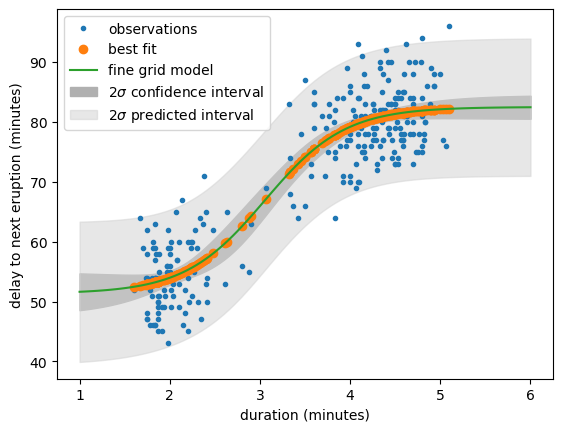

In [3]:
x_new = np.linspace(1, 6, 101)
y_new = result.eval(x=x_new)

dely = result.eval_uncertainty(x=x_new, sigma=2)

plt.plot(x, y, '.', label='observations')
plt.plot(x, result.best_fit, 'o', label='best fit')
plt.plot(x_new, y_new, '-', label='fine grid model')
plt.xlabel('duration (minutes)')
plt.ylabel('delay to next eruption (minutes)')
plt.fill_between(x_new, y_new-dely, y_new+dely,
                 color="#b0b0b0", label=r'$2\sigma$ confidence interval')

plt.fill_between(x_new, y_new-result.dely_predicted, y_new+result.dely_predicted,
                 color="#d3d3d388", label=r'$2\sigma$ predicted interval')
plt.legend()